<a href="https://colab.research.google.com/github/Gandhi247177/decodding-emotion/blob/main/google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving sentimentdataset.csv to sentimentdataset.csv


Load the Dataset

In [ ]:
import pandas as pd

# Replace with your file name if different
df = pd.read_csv('/content/sentimentdataset.csv')
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


Data Exploration

In [ ]:
# Basic information
df.info()

# Summary statistics
df.describe()

# Column names
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

Check for Missing Values and Duplicates

In [ ]:
# Missing values
print(df.isnull().sum())

# Duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64
Duplicate rows: 0


 Visualize a Few Features

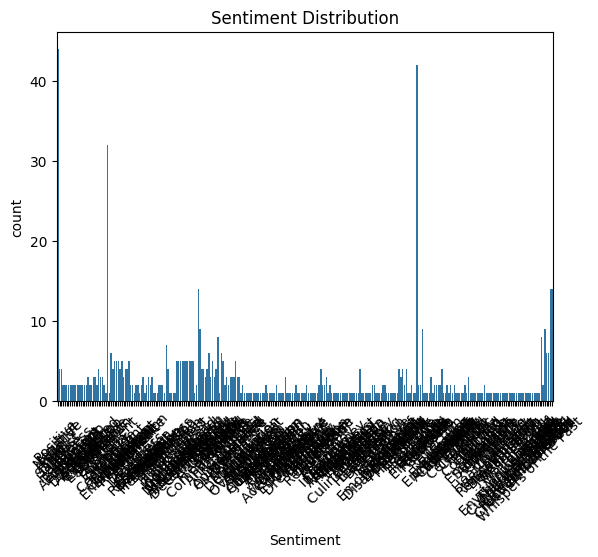

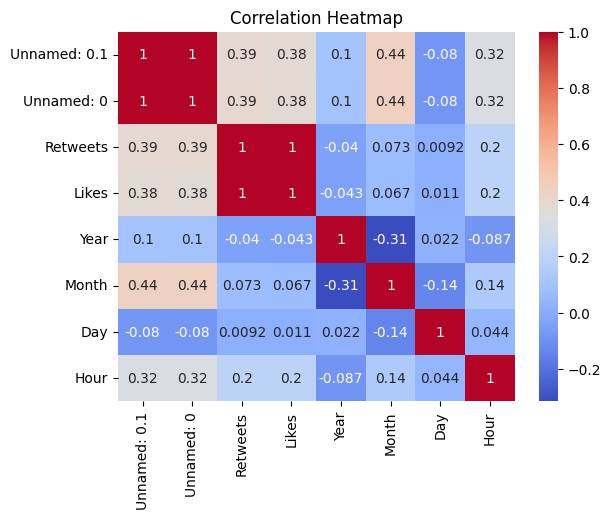

<Axes: xlabel='Platform', ylabel='count'>

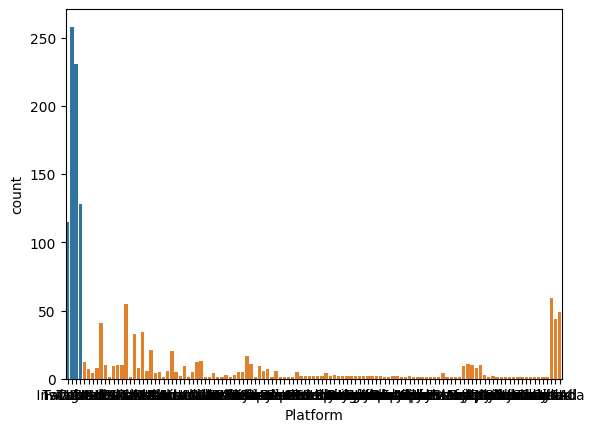

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.xticks(rotation=45)
plt.title("Sentiment Distribution")
plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
sns.countplot(data=df, x='Platform')      # Platform distribution
sns.countplot(data=df, x='Country')       # Posts per Country


Identify Target and Features

In [ ]:
# Define features (X) and target (y)
X = df.drop('Sentiment', axis=1)
y = df['Sentiment']


Convert Categorical Columns to Numerical

In [ ]:
# Example: converting all object type columns
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes


One-Hot Encoding

In [ ]:
X = pd.get_dummies(X, drop_first=True)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


Model Building




In [ ]:
from sklearn.ensemble import RandomForestClassifier  # or Regressor based on task

model = RandomForestClassifier()  # Change if regression task
model.fit(X_train, y_train)


RandomForestClassifier()

Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.4013605442176871
                        precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
       Accomplishment        0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Adoration           0.00      0.00      0.00         0
       Adrenaline            0.00      0.00      0.00         0
         Affection           1.00      1.00      1.00         1
            Amazement        0.00      0.00      0.00         0
      Ambivalence            1.00      1.00      1.00         1
         Amusement           0.00      0.00      0.00         0
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      1.00      1.00         3
        Ar

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Make Predictions from New Input

In [ ]:
import pandas as pd

# Sample input row with all expected columns
new_input = pd.DataFrame([{
    'Unnamed: 0.1': 0,
    'Unnamed: 0': 0,
    'Text': "Just posted a new blog article!",
    'Timestamp': "2023-01-20 10:30:00",
    'User': "BloggerX",
    'Platform': "Twitter",
    'Hashtags': "#blog #update",
    'Retweets': 10.0,
    'Likes': 22.0,
    'Country': "USA",
    'Year': 2023,
    'Month': 1,
    'Day': 20,
    'Hour': 10
}])


Convert to DataFrame and Encode

In [ ]:
[
 'Age', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
 'Department_Research & Development', 'Department_Sales',
 'EducationField_Human Resources', 'EducationField_Life Sciences',
 'EducationField_Marketing', 'EducationField_Medical',
 'EducationField_Other', 'EducationField_Technical Degree',
 'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
 'JobRole_Human Resources', 'JobRole_Laboratory Technician',
 'JobRole_Manager', 'JobRole_Manufacturing Director',
 'JobRole_Research Director', 'JobRole_Research Scientist',
 'JobRole_Sales Executive', 'JobRole_Sales Representative',
 'MaritalStatus_Divorced', 'MaritalStatus_Married',
 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'
]


['Age',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_No',
 'Over

In [ ]:
input_dict = {
    'Age': 35,
    'MonthlyIncome': 6500,
    'NumCompaniesWorked': 3,
    'PercentSalaryHike': 15,
    'TotalWorkingYears': 10,
    'TrainingTimesLastYear': 3,
    'YearsAtCompany': 6,
    'YearsInCurrentRole': 4,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 5,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'EducationField': 'Life Sciences',
    'Gender': 'Male',
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Married',
    'OverTime': 'Yes'
}


Predict the Final Grade (or label)

In [ ]:
import pandas as pd

# Correctly structured new input
new_df = pd.DataFrame({
    'Text': ["Just had an amazing day exploring the city!"],
    'Timestamp': ["2023-05-11 14:30:00"],
    'Platform': ["Twitter"],
    'Hashtags': ["#Travel #CityLife"],
    'Retweets': [10],
    'Likes': [120],
    'Country': ["USA"],
    'Year': [2023],
    'Month': [5],
    'Day': [11],
    'Hour': [14],
})


Deployment - Building an Interactive App

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
def predict_final_grade(input1, input2, ...):  # replace with actual feature names
    input_df = pd.DataFrame([[input1, input2, ...]], columns=X.columns)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    input_scaled = scaler.transform(input_df)
    result = model.predict(input_scaled)
    return f"Predicted Result: {result[0]}"

Create the Gradio Interface

In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict_final_grade,
    inputs=[gr.Textbox(label=col) for col in X.columns],
    outputs="text",
    title="Final Grade Predictor"
)
interface.launch()


/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1018: UserWarning: Expected 11 arguments for function <function predict_final_grade at 0x792d0c0aaac0>, received 14.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1026: UserWarning: Expected maximum 11 arguments for function <function predict_final_grade at 0x792d0c0aaac0>, received 14.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://46a10c26604f754f21.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
